# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цели исследования:** 
* определить рыночную стоимость объектов недвижимости;
* установить параметры, влияющие на ценообразование;
* построить автоматизированную систему, позволяющую отследить отследить аномалии и мошенническую деятельность

**Этапы исследования:**
* обзор данных;
* предобработка данных (заполнение пропусков, устранение дубликатов, редких и аномальных значений);
* добавление в таблицу столбцов, необходимых для дальнейшего исследования;
* изучение параметров объектов недвижимости;
* изучение скорости продажи квартир;
* рассмотрение факторов, влияющих на ценообразование;
* написание общего вывода.

### Откроем файл с данными и изучим общую информацию. 

#### Загрузим данные из файла в датафрейм.

Импортируем библитеку pandas, сохраняем данные в переменной data, используя разделитель. Выводим на экран первые 15 строк датасета для ознакомления.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t')

pd.set_option('display.max_columns', None)
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Изучим общую информацию о полученном датафрейме.

Изучим информацию о датасете, вызвав метод `info()`. Всего в датасете 23699 строк и 22 колонки. В данных имеются пропуски. Решение о том, каким образом обрабатывать пропуски, будет приниматься для каждого столбца отдельно. Если пропусков немного, можно безболезненно удалить строки. Например, для столбца locality_name заполнить пропуск на основании имеющихся данных невозможно, поэтому строки с пустыми значениями можно удалить. Ряд пропусков можно попробовать заполнить средним (медианным) значением. Для некоторых отсутствие заполненного значения вероятнее всего значит False или 0 (например, количество балконов или свободная планировка).
Также на этапе предобработки будет необходимо изменить тип данных в некоторых столбцах, например, в столбце `'first_day_exposition'` поменять тип на `datetime`. 

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Построим общую гистограмму для всех числовых столбцов таблицы.

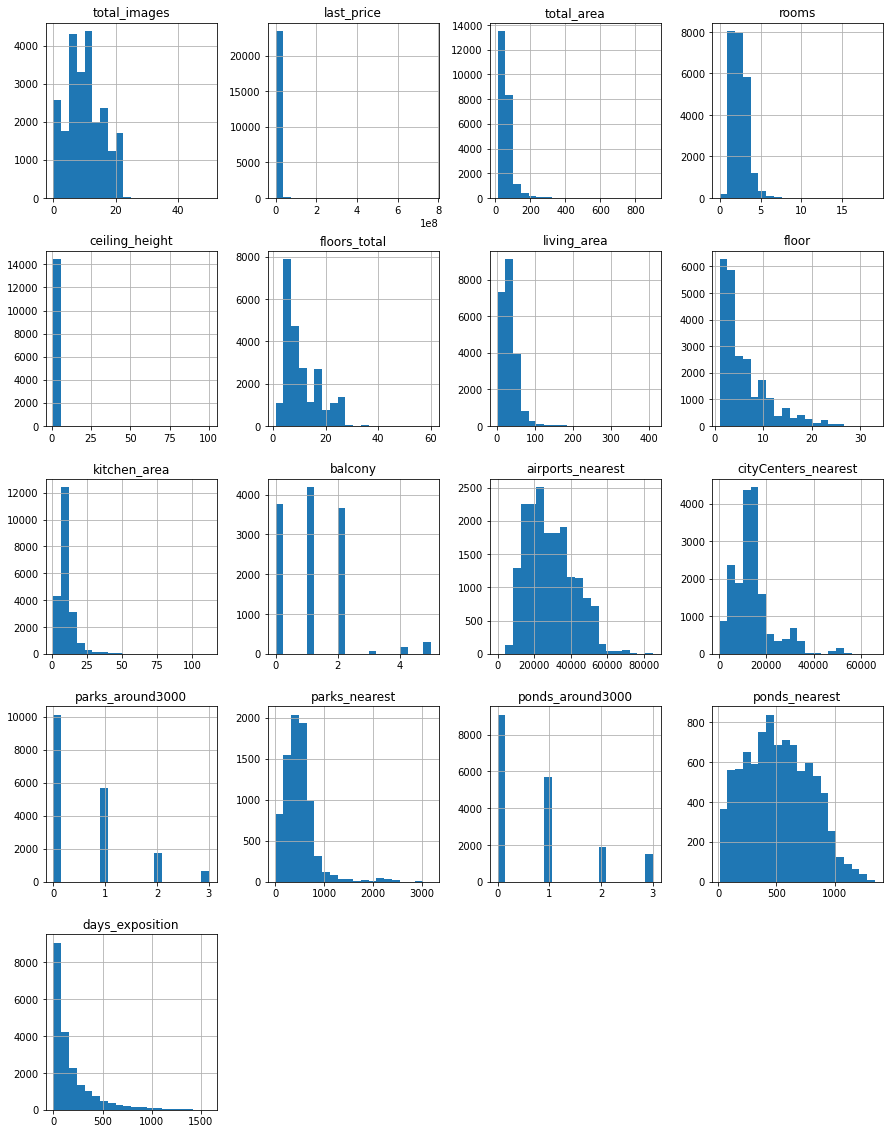

In [3]:
data.hist(figsize=(15, 20), bins=20)
plt.show()

**Дополнительные данные и графики**

Получим числовое описание данных по столбцам методом `describe()`

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Отдельная гистограмма для значений столбца `'last_price'` обозначением "шага" для корзин.

<AxesSubplot:>

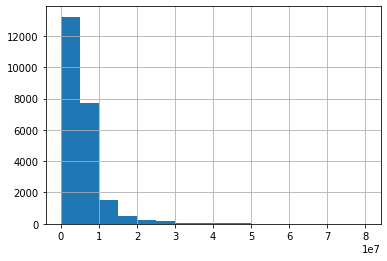

In [5]:
data['last_price'].hist(bins=
                        [0, 5000000, 10000000, 15000000, 20000000, 
                         25000000, 30000000, 35000000, 40000000,
                         45000000, 50000000, 55000000, 60000000,
                         65000000, 70000000, 75000000, 80000000,
                        ]
                       )

Отдельная гистограмма для столбца `'total_area'`

<AxesSubplot:>

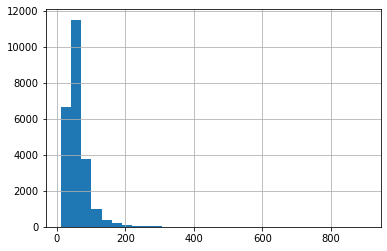

In [6]:
data['total_area'].hist(bins=30)

In [7]:
np.percentile(data['total_area'], [90, 99])

array([ 93.52 , 197.214])

<AxesSubplot:>

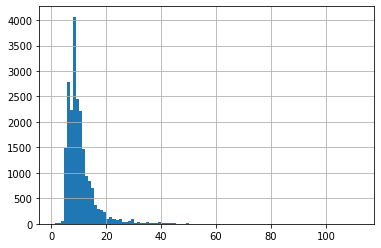

In [8]:
data['kitchen_area'].hist(bins=100)

<AxesSubplot:>

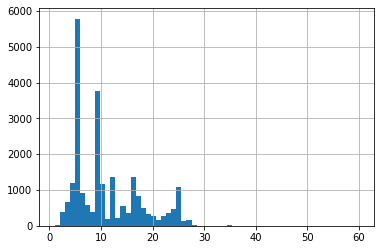

In [9]:
data['floors_total'].hist(bins=60)

<AxesSubplot:>

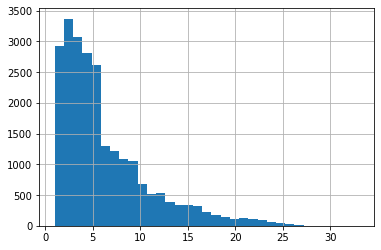

In [10]:
data['floor'].hist(bins=33)

**Вывод:** Гистограммы показывают распределение значений в числовых столбцах. На основании гистограмм и дополнительных данных можно привести следующие наблюдения.

* `'total_images'` -  общее количество фотографий объекта в объявлениях в основном находится в диапазоне 0-20, график показывает распределение, близкое к нормальному, чаще всего в объявлениях примерно 6-12 фотографий. Однако есть выбросы примерно в 30 и 50 фотографий.
* `'last_price'` – отображение данных на общей гистограмме выглядит необычно, дает мало информации о диапазоне цен. Была предпринята попытка разбить все множество на диапазоны по 5000000, больше всего объявлений оказалось в диапазоне 0-5000000 и 5000 000-10000000. Неправдопоподобно выглядит минимальная цена (12190). Цена на момент снятия объявления с продажи выше 20000000 (и тем более 30000000) - редкость.
* `'total_area'` – общая площадь квартир, согласно объявлениям, от 12 до 900 м. Минимальное значение выглядит неправдоподобно для квартиры. Подавляющее большинство значений не превышают 100 м, объявлений с общей площадью более 200 м -– около 1%.
* `'rooms'` -  наибольшее количество объявлений о продаже одно-, двух- и трехкомнатных квартир. Объявления о продаже квартир с болеее чем 5-ю комнатами - редкость. Есть выбросы (максимальное значение - 19) и нулевые значения.
* `'ceiling_height'` - есть неправдоподобные значения (min – 1 м, max – 25 и 100 м). Много пропущенных значений.
* `'floors_total'` – наибольшее число квартир расположены в пяти- и девятиэтажных домах (предположительно, типовая застройка). Основная масса домов не превышает 30 этажей, но есть выбросы. Желательно поменять тип данных на целочисленный, есть пропуски.
* `'living_area'` - жилая площадь от 2 м (аномально низкое значение) до 400 м (выброс). Жилая площадь большей части квартир не превышает 100 м. В 3/4 жилая площадь не превышает 43 м. Есть пропуски.
* `'floor'` - наибольшее количество квартир находится на первых 5 этажах. Прослеживается закономерность: чем выше значение этажа, тем меньше объявлений.
* `'kitchen_area'` - в большинстве объявлений площадь кухни около 9-12 м. Есть пропуски и аномальные значения и выбросы (минимальное - 1.3 м, максимальное - 112 м)
* `'balcony'` - наиболее типичны квартиры с 1-2 балконами или без балкона. В данных много пропусков.
* `'airports_nearest'` - гистограмма показывает распределение, близкое к нормальному, при этом отсутствие "подъема" слева может объясняться тем, что жилая застройки в непосредственной близости к аэропорту, как правило, отсутствует (запрещена). В данных есть пропуски, нулевые значения (аномалия в данном случае)
* `'cityCenters_nearest'` –  распределение не похоже на нормальное. Можно предположить, что появление небольшого пика справа (около 30 км от центра) связано с сосредоточением объектов жилой ненвижимости в пригородах. Есть пропущенные значения, название столбца лучше заменить на `'city_сenters_nearest'`.
* `'days_exposition'` - распределение времени размещения объявлений соответствует распределению Пуассона. Есть пропуски.
* `'first_day_exposition'` — дата публикации, необходимо перевести в формат datetime. 
* `'is_apartment'` — в описании данных к проекту указан булев тип, следует поменять формат данных (сейчас `object`). Пропуски составляют большинство.
* `'locality_name'` - есть небольшое количество пропусков.
* `'open_plan`' - на первый взгляд, нет проблем с этим столбцом.
* `'parks_around3000'` и `'ponds_around3000'` — столбцы с одинаковым количеством пропусков (и на 1 меньше, чем в столбце `'cityCenters_nearest'`), наиболее характерно отсутствие парков или водоемов в 3 км от объекта недвижимости, при этом отсутствуют случаи, где их число превышало бы 3.
* `'parks_nearest'` и `'ponds_nearest'` – распределения похожи на нормальные (за исключением выбросов), при наличии прудов и парков поблизости расстояние до них чаще всего составляет около 500 м. Большое количество пропусков может быть связано с тем, что при отсутствии парков и водоемов в радиусе 3 км (значение о в столбцах `'parks_around3000'` и `'ponds_around3000'`) данные о ближайших водоемах/парках оставляли незаполненными.

### Предобработка данных

Прежде всего изменим названия столбцов в соответствии с правилами хорошего стиля.

In [11]:
data = data.rename(
    columns={'parks_around3000':'parks_around_3000',
             'ponds_around3000':'ponds_around_3000',
             'cityCenters_nearest':'city_centers_nearest'
             }
)
list(data)

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'city_centers_nearest',
 'parks_around_3000',
 'parks_nearest',
 'ponds_around_3000',
 'ponds_nearest',
 'days_exposition']

#### Найдем и изучим пропущенные значения в столбцах

* **Определим, в каких столбцах есть пропуски.** 
Это можно сделать на основании данных, выводимых при применении метода `info()`, см. выше (все столбцы, число значений в которых менее 23699, содержат пропуски). Однако удобнее суммировать число пустых значений по столбцам и сортировать их в порядке убывания. 14 столбцов содержат пропущенные значения. Для столбцов `'is_apartment'`, `'parks_nearest'`, `'ponds_nearest'`, `'balcony'`, `'ceiling_height'` количество пропусков значительно. 

In [12]:
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
ponds_around_3000        5518
parks_around_3000        5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

* **Заполним пропущенные значения там, где это возможно, и приведем пояснения**. 
* Пропуски значений в столбце 'balcony' заменим на 0. 
* Будем считать, что если в объявлении не указано, что квартира - это апартаменты, то она ими не  является (заменим пропуски на False). 
* Проверим гипотезу, согласно которой пропуски в столбцах `'parks_around_3000'`, `'ponds_around_3000'` и `'city_centers_nearest'` присутствуют в одних и тех же объявлениях. По крайней мере можно говорить, что если не заполнена информация о расстоянии до центра города (`'city_centers_nearest'`), то значения столбцов `'airports_nearest'`, `'parks_around_3000'` и `'ponds_around_3000'` остаются незаполненными. Можно также предположить, что пропущенные значения в столбцах  `'parks_around_3000'` и `'ponds_around_3000'` означают отсутстствие парков и водоемов в радиусе 3 км, в таком случем пропуски можно было бы заполнить 0, однако сомнения в правильности такого решения вызывает количество пропусков, а также то, что пропуски в картографических данных присутствуют (практически в таком же количестве) и в столбцах, для которых значение невозможно предсказать.
* Также проверим гипотезу, согласно которой пропуски в столбцах `'parks_nearest'`, `'ponds_nearest'`связаны с нулевыми или отсутствующими значениями в столбцах `'parks_around_3000'` и `'ponds_around_3000'` соответственно. Гипотеза подтверждается (за исключением 4 случаев для столбца 'parks_nearest')
* Значения в столбцах `'parks_around_3000'`, `'ponds_around_3000'` и `'city_centers_nearest'` оставляем незаполненными, поскольку нет данных для их заполнения. Значения в столбцам `'parks_around_3000'` и `'ponds_around_3000'` также оставляем как есть.
* Пропуски в столбце `'ceiling_height'` можно заполнить средними или медианными данными (поскольку есть выбросы, медиана как средняя величина здесь лучше, чем среднее арифметическое). При этом следует помнить, что такое решение не лишено недостатков, так как, как правило, высота потолков – стандартная величина (2.55 м, 2.7 м, 3 м), и мы не можем ее узнать, исходя из имеющихся данных.
* Пропуски в столбце `'days_exposition'` могут означать, что объект не снят с продажи. Оставляем пропуски как есть, поскольку попытка их заполнения (например, нулями) может исказить данные.
* В столбцах `'floors_total'` и `'locality_name'` небольшое количество пропусков, их можно безболезненно удалить.
* Пропуски в столбце `'kitchen_area'` можно заполнить медианным значением. Такое решение кажется уместным, учитывая преобладание в выборке квартир со "стандартной" площадью 9-12 кв. м. Однако также можно предположить, что площадь кухни также пропорциональна общей площади (в больших квартирах большие кухни, в маленьких - маленькие). Вычислим медианную долю площади кухни и умножим на общую площадь для заполнения пропусков.
* Пропуски в столбце `'living_area'` можно заполнить, вычислив медианную долю площади жилых помещений и умножив общую площадь на эту долю для каждого пропуска в столбце `'living_area'`. 
* После заполнения пропусков в столбцах `'kitchen_area'` и `'living_area'` устраним возможные случаи, в которых сумма общей площади и площади кухни превышает общую площадь.

In [13]:
# Заменим пропущенные значения в столбце 'balcony' на 0. 
data['balcony'] = data['balcony'].fillna(0)

# Заменим пропущенные значения в столбце 'is_apartment' на False. 
data['is_apartment'] = data['is_apartment'].fillna(False)

# Рассмотрим данные о количестве пропущенных  пропущенных значений в столбцах в подмножестве объявлений
# c пропущенными значениями в столбце 'city_centers_nearest'. 
data[data['city_centers_nearest'].isna()].info()

# проверка гипотезы о связи пропусков в столбцах 'parks_nearest', 'ponds_nearest'
# с нулевыми или пропущенными значениями в столбцах 'parks_around_3000' и 'ponds_around_3000'
data.query('parks_around_3000 == 0 or parks_around_3000.isna()').info()
data.query('ponds_around_3000 == 0 or ponds_around_3000.isna()').info()

# удаление значений для столбцов с малым количеством пропусков
data=data.dropna(subset=['locality_name', 'floors_total']).reset_index(drop=True)

#заполнение пропусков в столбце 'ceiling_height' медианным значением
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 

#заполнение пропусков в столбце 'kitchen_area' 
data['kitchen_area'] =(data['kitchen_area']
                      .fillna((data['kitchen_area']/data['total_area']).median()
                              * data['total_area'])) 

#заполнение пропусков в столбце 'living_area' 
data['living_area']=(data['living_area']
                      .fillna((data['living_area']/data['total_area']).median()
                              * data['total_area']))

#устранение случаев, где сумма 'kitchen_area' и 'living_area' превышает 'total_area'
data = data.query('(kitchen_area + living_area) < total_area')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5519 entries, 5 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          5519 non-null   int64  
 1   last_price            5519 non-null   float64
 2   total_area            5519 non-null   float64
 3   first_day_exposition  5519 non-null   object 
 4   rooms                 5519 non-null   int64  
 5   ceiling_height        2944 non-null   float64
 6   floors_total          5509 non-null   float64
 7   living_area           4896 non-null   float64
 8   floor                 5519 non-null   int64  
 9   is_apartment          5519 non-null   bool   
 10  studio                5519 non-null   bool   
 11  open_plan             5519 non-null   bool   
 12  kitchen_area          4804 non-null   float64
 13  balcony               5519 non-null   float64
 14  locality_name         5511 non-null   object 
 15  airports_nearest    

#### Рассмотрим типы данных в каждом столбце

**Найдем столбцы, в которых нужно изменить тип данных, изменим данные и поясним решение.**
Еще раз вызовем метод `info`. Тип данных в столбцах `'floors_total'`, `'balcony'`, `'parks_around_3000'`, `'ponds_around_3000'`, `'days_exposition'` следует поменять на целочисленный (поскольку дробных значений здесь быть не может), в столбце `'first_day_exposition'` - на `datetime` (поскольку речь идет о дате), в столбце `'is_apartment'` тип данных изменился на булев при заполнении пропусков. Также разумно поменять тип данных на целочисленный в столбце `'last_price'`, т.к. цены на незвижимость обычно выставляют "без копеек".

Поскольку в столбцах `'parks_around_3000'`, `'ponds_around_3000'`, `'days_exposition'` оставлены пустые значения, тип данных изменить невозможно.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23379 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23379 non-null  int64  
 1   last_price            23379 non-null  float64
 2   total_area            23379 non-null  float64
 3   first_day_exposition  23379 non-null  object 
 4   rooms                 23379 non-null  int64  
 5   ceiling_height        23379 non-null  float64
 6   floors_total          23379 non-null  float64
 7   living_area           23379 non-null  float64
 8   floor                 23379 non-null  int64  
 9   is_apartment          23379 non-null  bool   
 10  studio                23379 non-null  bool   
 11  open_plan             23379 non-null  bool   
 12  kitchen_area          23379 non-null  float64
 13  balcony               23379 non-null  float64
 14  locality_name         23379 non-null  object 
 15  airports_nearest   

In [15]:
# поменяем тип данных в 'floors_total' и 'balcony' и 'last_price' на целочисленный
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['last_price'] = data['last_price'].astype(int)

# поменяем тип данных в столбце 'first_day_exposition' на datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Проверим полученный результат

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23379 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23379 non-null  int64         
 1   last_price            23379 non-null  int64         
 2   total_area            23379 non-null  float64       
 3   first_day_exposition  23379 non-null  datetime64[ns]
 4   rooms                 23379 non-null  int64         
 5   ceiling_height        23379 non-null  float64       
 6   floors_total          23379 non-null  int64         
 7   living_area           23379 non-null  float64       
 8   floor                 23379 non-null  int64         
 9   is_apartment          23379 non-null  bool          
 10  studio                23379 non-null  bool          
 11  open_plan             23379 non-null  bool          
 12  kitchen_area          23379 non-null  float64       
 13  balcony         

#### Изучим уникальные значения в столбце с названиями и устраните неявные дубликаты.

Для начала проверим данные на явные дубликаты, а потом будем устранять неявные.

In [17]:
data.duplicated().sum()

0

Явных дубликатов нет

In [18]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [19]:
data['locality_name'].value_counts()

Санкт-Петербург                    15535
посёлок Мурино                       510
посёлок Шушары                       438
Всеволожск                           390
Пушкин                               368
                                   ...  
поселок Володарское                    1
коттеджный поселок Счастье             1
посёлок Ропша                          1
деревня Кисельня                       1
посёлок Платформа 69-й километр        1
Name: locality_name, Length: 364, dtype: int64

Всего 364 уникальных названия. При этом пока ничего не понятно, попробуем упорядочить по алфавиту.

In [20]:
sorted(data['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

Можно заметить, что в названиях встречаются как разные написания "поселок" и "посёлок", "поселок городского типа" и "городской посёлок" и т.д. Сделаем следующее: 1) приведем "поселок" и "посёлок" к единому написанию, 2) заменим "городской поселок" на "поселок городского типа", 3) заменим "поселок при железнодорожной станции" на "поселок станции", 4) заменим "садоводческое некоммерческое товарищество" на "cадовое товарищество"

In [21]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции','поселок станции')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'садовое товарищество')
sorted(data['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня Глинка',
 '

In [22]:
data['locality_name'].value_counts()

Санкт-Петербург                       15535
поселок Мурино                          540
поселок Шушары                          438
Всеволожск                              390
Пушкин                                  368
                                      ...  
поселок Калитино                          1
поселок станции Корнево                   1
поселок Плоское                           1
поселок городского типа Свирьстрой        1
поселок Ропша                             1
Name: locality_name, Length: 321, dtype: int64

**Вывод:** Вместо 364 стало 321 название. Таким образом, были удалены 43 неявных дубликата.

#### Найдем и устраним редкие и выбивающиеся значения

Рассмотрим значения в столбцах на предмет аномалий и устраним редкие и выбивающиеся значения. На каждом последующем этапе будем работать с ранее полученным срезом.

Рассмотрим значения в столбце `'total_area'`. Значения находятся в диапазоне от 13 до 900 м. При этом общая площадь более 200 м – уже редкость. Кроме того, минимальная общая площадь (13 м) выглядит аномально даже для студии. В связи с этим устраним из рассмотрения объекты площадью менее 20 м (как показывает гистограмма, таких очень немного) и более 200 м.

count    23379.000000
mean        60.386937
std         35.684392
min         13.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

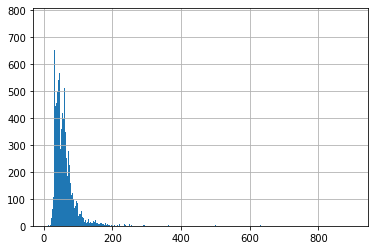

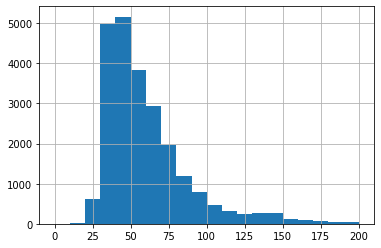

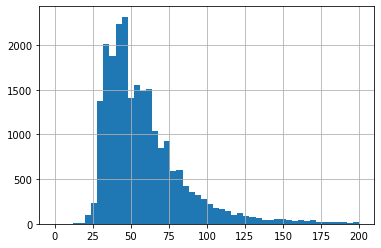

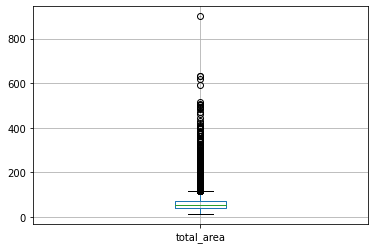

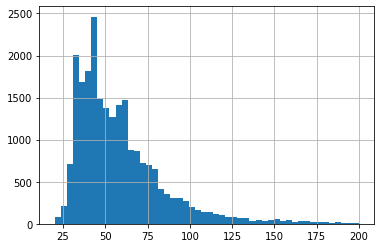

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.600000,1,False,False,False,11.000000,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,2.65,14,90.345393,9,False,False,False,27.405646,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23560,9,9700000,133.81,2017-03-21,3,3.70,5,73.300000,3,False,False,False,13.830000,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23561,14,3100000,59.00,2018-01-15,3,2.65,5,38.000000,4,False,False,False,8.500000,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23562,18,2500000,56.70,2018-02-11,2,2.65,3,29.700000,1,False,False,False,9.772957,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23563,13,11475000,76.75,2017-03-28,2,3.00,17,43.610119,12,False,False,False,23.300000,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [23]:
#описание данных
display(data['total_area'].describe())

#гистограммы с разным набором параметров
data['total_area'].hist(bins=900)
plt.show()
data['total_area'].hist(bins=
                        [0, 10, 20, 30, 40, 
                         50, 60, 70, 80,
                         90, 100, 110, 120,
                         130, 130, 150, 160,
                         170, 180, 190, 200
                        ]
                       )
plt.show()

data['total_area'].hist(bins=50, range=(0, 200))
plt.show()

#диаграмма размаха
data.boxplot('total_area')
plt.show()

#срез данных для квартир в диапазоне от 20 до 200 м
data = data.query('20 <= total_area <= 200')

#проверка полученного среза
data['total_area'].hist(bins=50)
plt.show()

data

Рассмотрим значения в столбце `'ceiling_height'`. Минимальное значение - 1 м, максимальное - 100 м. Будем исходить из того, что высота потолка в помещениях квартиры не может быть менее 2.1 м (см. https://www.dp.ru/a/2016/10/27/Dostich_potolka). Если судить по гистограмме, то высота потолков более 5 метров - также редкость. Кроме того, можно заметить ряд случаев, в которых высота потолка находится в диапазоне от 20 до 32 м. Будем считать, что в этих случаях данные введены с ошибкой, заменим их на вещественные значения (от 2.0 до 3.2).

count    23134.000000
mean         2.713866
std          0.730189
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         32.000000
Name: ceiling_height, dtype: float64

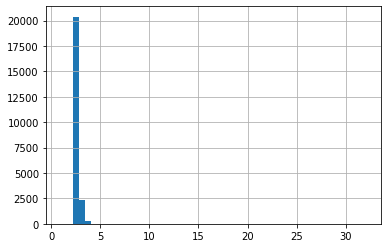

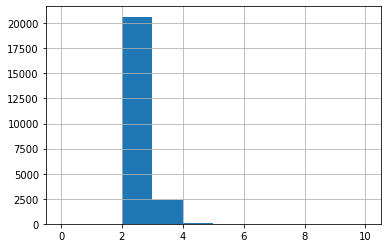

[1.0,
 1.2,
 1.75,
 2.0,
 2.25,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.7,
 3.75,
 3.78,
 3.8,
 3.83,
 3.84,
 3.85,
 3.88,
 3.9,
 3.93,
 3.95,
 3.98,
 4.0,
 4.06,
 4.1,
 4.14,
 4.15,
 4.19,


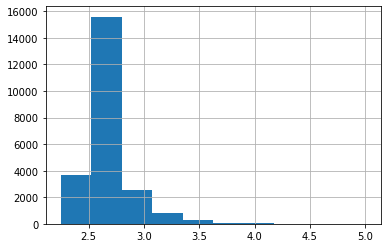

count    23110.000000
mean         2.692024
std          0.205585
min          2.250000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

In [24]:
#описание данных
display(data['ceiling_height'].describe())

#гистограммы с разным набором параметров
data['ceiling_height'].hist(bins=50)
plt.show()
data['ceiling_height'].hist(range=(0, 10))
plt.show()

#уникальные значения, сортированные по возрастанию
display(sorted(data['ceiling_height'].unique()))

# заменим значения в диапазоне от 20 до 32 на порядок меньше
data.loc[(data['ceiling_height']>=20) & (data['ceiling_height']<=32), 'ceiling_height'] = data['ceiling_height']/10 

# проверим, что значения от 20 до 32 заменены
sorted(data['ceiling_height'].unique())

#срез данных для квартир в с высотой потолков от 2.1 до 5 м
data = data.query('2.1 <= ceiling_height <= 5')

#проверка полученного среза
data['ceiling_height'].hist()
plt.show()

data['ceiling_height'].describe()

Рассмотрим значения в столбце `'living_area'`. Как было отмечено выше, здесь есть выбросы. Устраним неправдоподобно малые и выбивающиеся большие значения. 

*Определение минимальной площади жилых помещений:* даже в квартире-студии минимальная жилая площадь не может быть меньше определенной площади. Согласно нормативам, это 14 кв.м (https://qayli.com/journal/chto-takoe-kvartira-studiya-i-kakie-u-nee-osobennosti/). В исследуемом архиве объявлений присутствуют объекты с меньшей жилой площадью, при этом в единичных случаях жилая площадь менее 9 кв.м. Примем  9 кв.м. за минимальное пороговое значение.

*Определение максимальной площади жилых помещений:* судя по гистограмме, жилая площадь более 120 кв.м. - редкость.

Определим жилую площадь в диапазоне от 9 до 120 кв.м.

count    23110.000000
mean        33.249058
std         17.217871
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

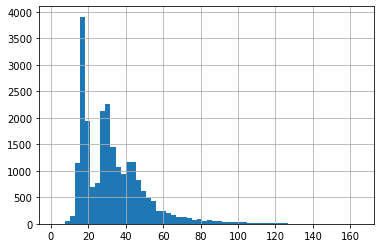

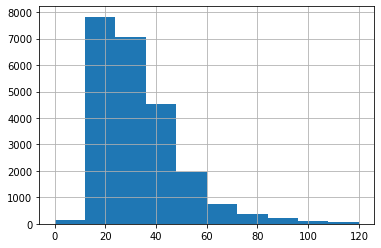

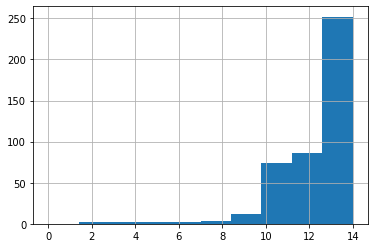

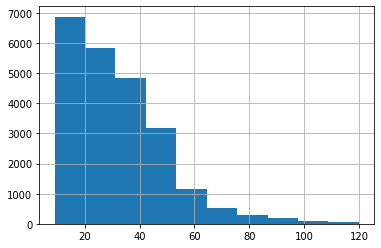

In [25]:
#описание данных
display(data['living_area'].describe())

#гистограммы с разным набором параметров
data['living_area'].hist(bins=60)
plt.show()
data['living_area'].hist(range=(0, 120))
plt.show()
data['living_area'].hist(range=(0, 14))
plt.show()

#срез данных для квартир в с жилой площадью от 9 до 120 кв.м.
data = data.query('9 <= living_area <= 120')

#проверка полученного среза
data['living_area'].hist()
plt.show()


Рассмотрим значения в столбце `'kitchen_area'`. 
* Определение минимальной площади площади кухни:* в исследуемом архиве объявлений  объекты с площадью кухни менее 4 м являются редкостью.

* Определение максимальной площади кухни:* судя по гистограммам, площадь кухни более 30 кв.м. - редкость.

Определим площадь кухни в диапазоне от 4 до 30 кв.м.

count    23048.000000
mean        10.228256
std          5.255276
min          1.300000
25%          7.000000
50%          9.000000
75%         11.700000
max         93.200000
Name: kitchen_area, dtype: float64

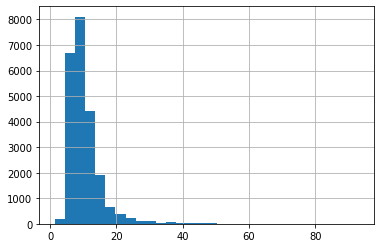

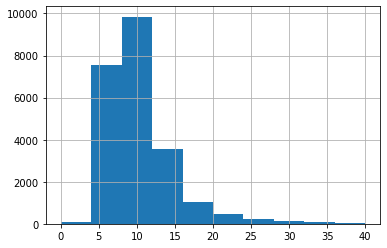

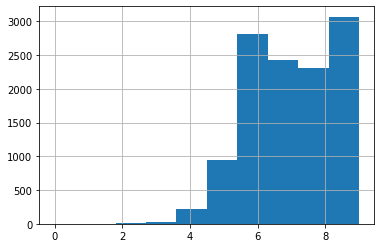

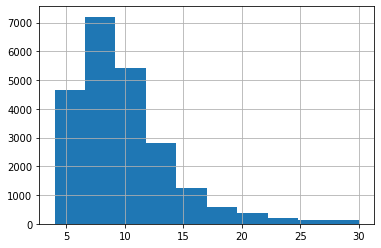

In [26]:
display(data['kitchen_area'].describe())

#гистограммы с разным набором параметров

data['kitchen_area'].hist(bins=30)
plt.show()
data['kitchen_area'].hist(range=(0, 40))
plt.show()
data['kitchen_area'].hist(range=(0, 9))
plt.show()

#срез данных для квартир в с площадью кухни от 4 до 30 кв.м.
data = data.query('4 <= kitchen_area <= 30')

#проверка полученного среза
data['kitchen_area'].hist()
plt.show()

Рассмотрим значения в столбце `'last_price'`. Можно заметить, что квартиры дороже 40 млн. встречаются крайне редко, а средние показатели лежат в пределах 4-6 млн. (среднее - 5.8, медиана - 4.6). Определим максимальное значение цены на момент снятия с публикации на уровне 40 млн.

count    2.271600e+04
mean     5.799158e+06
std      4.931673e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.550000e+06
max      1.240000e+08
Name: last_price, dtype: float64

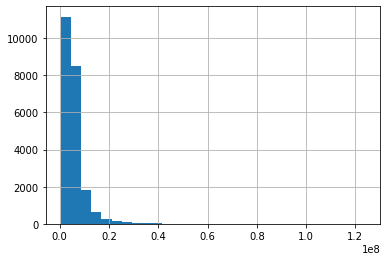

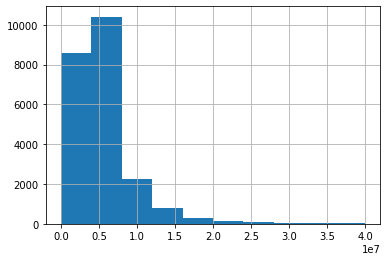

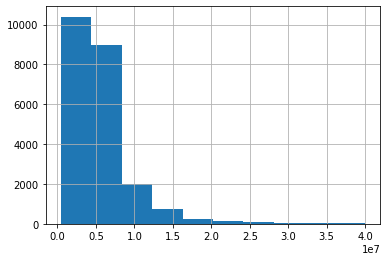

In [27]:
display(data['last_price'].describe())

#гистограммы с разным набором параметров

data['last_price'].hist(bins=30)
plt.show()
data['last_price'].hist(range=(0, 40000000))
plt.show()

#срез данных для квартир c ценой не более 40 млн. рублей
data = data.query('last_price <= 40000000')

#проверка полученного среза
data['last_price'].hist()
plt.show()

Рассмотрим значения в столбце `'floors_total'`. Диаграммы показывают, что общее количество этажей больше 30 - редкость. Установим это значение как максимальное.

count    22656.000000
mean        10.714998
std          6.594115
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

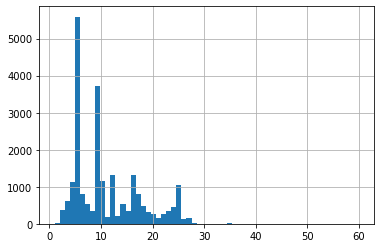

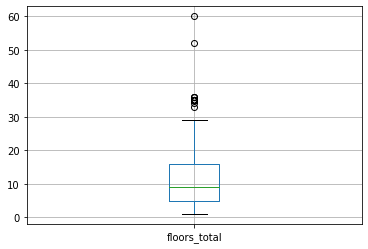

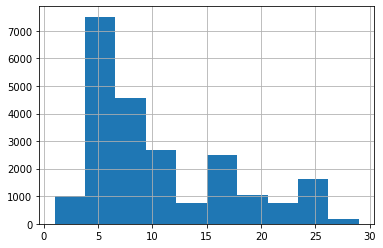

In [28]:
display(data['floors_total'].describe())

data['floors_total'].hist(bins=60)
plt.show()

data.boxplot('floors_total')
plt.show()

#срез данных для квартир в домах с общим количеством этажей менее 30
data = data.query('floors_total < 30')

#проверка полученного среза
data['floors_total'].hist()
plt.show()

Рассмотрим значения в столбце `'airports_nearest'`. В столбце присутствуют нулевые значения, что невозможно для жилой застройки. Такое объявление всего одно. Примем условие, что расстояние до аэропорта не равно нулю.

count    17243.000000
mean     28876.613640
std      12759.612987
min          0.000000
25%      18428.000000
50%      26911.000000
75%      37412.000000
max      84869.000000
Name: airports_nearest, dtype: float64

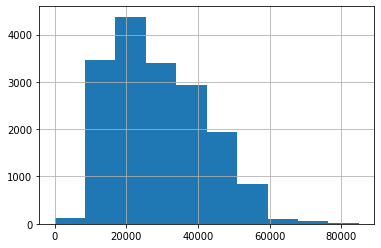

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
20968,0,7000000,34.7,2018-09-23,1,2.70,9,19.8,3,False,False,False,6.0,2,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0
12826,8,4199000,56.0,2017-12-21,2,2.65,9,27.0,5,False,False,False,15.0,0,Санкт-Петербург,6450.0,17461.0,0.0,NaN,1.0,444.0,24.0
3999,7,2268000,35.0,2017-12-21,1,2.65,9,14.0,6,False,False,False,8.0,0,Санкт-Петербург,6450.0,17461.0,0.0,NaN,1.0,444.0,25.0
7738,9,2750000,29.0,2017-02-19,1,2.50,4,15.0,1,False,False,False,6.0,0,Санкт-Петербург,6914.0,21486.0,1.0,215.0,0.0,NaN,43.0
23019,3,6490000,62.5,2015-03-18,2,2.65,24,33.5,15,False,False,False,9.0,4,Санкт-Петербург,6949.0,13165.0,1.0,711.0,0.0,NaN,917.0


,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
12289,12826,8,4199000,56.0,2017-12-21,2,2.65,9,27.0,5,False,False,False,15.0,0,Санкт-Петербург,6450.0,17461.0,0.0,NaN,1.0,444.0,24.0
3822,3999,7,2268000,35.0,2017-12-21,1,2.65,9,14.0,6,False,False,False,8.0,0,Санкт-Петербург,6450.0,17461.0,0.0,NaN,1.0,444.0,25.0
7412,7738,9,2750000,29.0,2017-02-19,1,2.50,4,15.0,1,False,False,False,6.0,0,Санкт-Петербург,6914.0,21486.0,1.0,215.0,0.0,NaN,43.0
22093,23019,3,6490000,62.5,2015-03-18,2,2.65,24,33.5,15,False,False,False,9.0,4,Санкт-Петербург,6949.0,13165.0,1.0,711.0,0.0,NaN,917.0
4822,5037,11,6000000,53.0,2017-12-12,2,2.50,14,32.0,6,False,False,False,9.0,1,Санкт-Петербург,6989.0,13205.0,1.0,535.0,0.0,NaN,60.0


count    17242.000000
mean     28878.288424
std      12758.087590
min       6450.000000
25%      18428.000000
50%      26912.500000
75%      37412.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [29]:
display(data['airports_nearest'].describe())

data['airports_nearest'].hist()
plt.show()

display(data.sort_values('airports_nearest').head())

#расстоянние до аэропорта не равно нулю
data = data.loc[data['airports_nearest'] != 0].reset_index()

#проверка полученных данных 
display(data.sort_values('airports_nearest').head())
display(data['airports_nearest'].describe())

**Вывод:** Исходные данные содержали редкие, выбивающиеся, а иногда и неправдоподобные значения. Такие аномалии были устранены. Можно приступать к анализу. Также на основании этого этапа исследования можно построить автоматическую систему, которая будет показывать, насколько "нормальными" являются исследуемые данные.

### Посчитаем и добавим в таблицу новые столбцы

* цена одного квадратного метра;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «первый», «последний», «другой»);
* расстояние до центра города в километрах (в км, целые значения).

In [30]:
# цена квадратного метра
data['square_meter_price'] = data['last_price']/data['total_area']

# день недели публикации объявления
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday

# месяц публикации объявления
data['exposition_month'] = data['first_day_exposition'].dt.month

# год публикации объявления
data['exposition_year'] = data['first_day_exposition'].dt.year

# тип этажа квартиры (значения — «первый», «последний», «другой»)
def categorize_floors(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
data['floor_type'] = data.apply(categorize_floors, axis = 1)

# расстояние до центра города в километрах
data['city_centers_nearest_km'] = (data['city_centers_nearest']/1000).round()

data

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,exposition_weekday,exposition_month,exposition_year,floor_type,city_centers_nearest_km
0,0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,1,7,3350000,40.40,2018-12-04,1,2.65,11,18.600000,1,False,False,False,11.000000,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,2,10,5196000,56.00,2015-08-20,2,2.65,5,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,5,10,2890000,30.40,2018-09-10,1,2.65,12,14.400000,5,False,False,False,9.100000,0,поселок городского типа Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,другой,NaN
4,6,6,3700000,37.30,2017-11-02,1,2.65,26,10.600000,6,False,False,False,14.400000,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,другой,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22620,23560,9,9700000,133.81,2017-03-21,3,3.70,5,73.300000,3,False,False,False,13.830000,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72490.845228,1,3,2017,другой,4.0
22621,23561,14,3100000,59.00,2018-01-15,3,2.65,5,38.000000,4,False,False,False,8.500000,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52542.372881,0,1,2018,другой,NaN
22622,23562,18,2500000,56.70,2018-02-11,2,2.65,3,29.700000,1,False,False,False,9.772957,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44091.710758,6,2,2018,первый,NaN
22623,23563,13,11475000,76.75,2017-03-28,2,3.00,17,43.610119,12,False,False,False,23.300000,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511.400651,1,3,2017,другой,10.0


### Проведем исследовательский анализ данных

#### Изучим следующие параметры объектов:
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* этаж квартиры;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего аэропорта;
* расстояние до ближайшего парка;
* день и месяц публикации объявления.

Постройте отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.

**Параметр "общая площадь"**

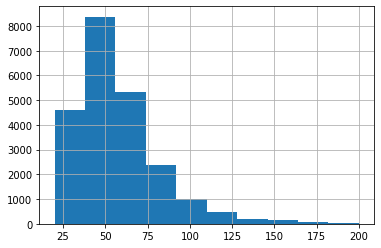

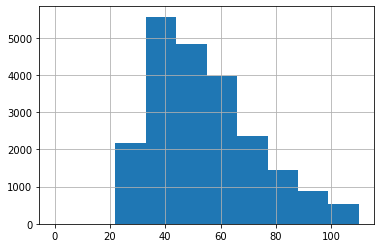

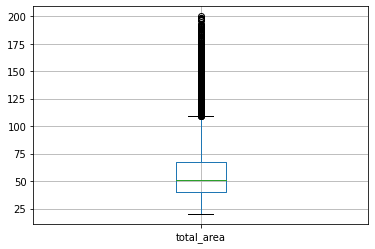

count    22625.000000
mean        57.124838
std         24.314596
min         20.000000
25%         40.000000
50%         51.200000
75%         67.800000
max        200.000000
Name: total_area, dtype: float64

In [31]:
data['total_area'].hist()
plt.show()

data['total_area'].hist(range=(0, 110))
plt.show()

data.boxplot('total_area')
plt.show()

data['total_area'].describe()

В среднем общая площадь выставленных на продажу квартир составляет около 40-70 кв.м. (межквартильный размах от 40 до 67.8), медианная площадь составляет 51.2 кв.м. (средняя - 57.1 кв.м.), при этом площадь квартир более 110 кв.м. - выбросы (это видно как на гистограмме, так и на диаграмме размаха).

**Параметр "жилая площадь"**

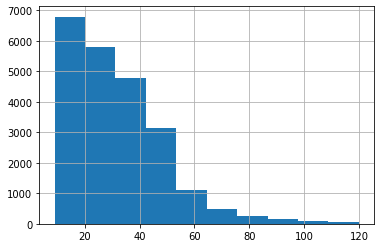

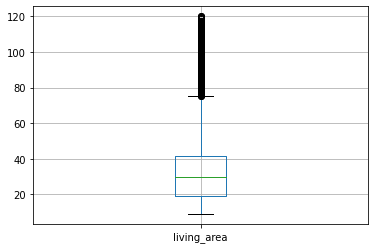

count    22625.000000
mean        32.747024
std         16.152408
min          9.000000
25%         18.900000
50%         30.000000
75%         41.500000
max        120.000000
Name: living_area, dtype: float64

In [32]:
data['living_area'].hist()
plt.show()

data.boxplot('living_area')
plt.show()

data['living_area'].describe()

В среднем жилая площадь (суммарная площадь жилых помещений) выставленных на продажу квартир составляет около 20-40 кв.м. (межквартильный размах от 18.9 до 41.5), медианная площадь составляет 30 кв.м. (средняя - 32.7 кв.м.), при этом жилая площадь более 75 кв.м. - выбросы. 

**Параметр "площадь кухни"**

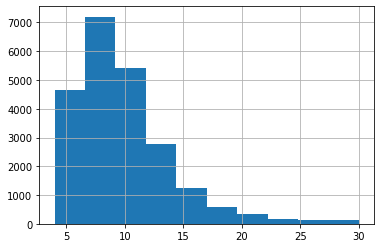

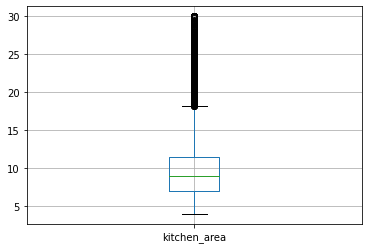

count    22625.000000
mean         9.887372
std          4.035382
min          4.000000
25%          7.000000
50%          9.000000
75%         11.500000
max         30.000000
Name: kitchen_area, dtype: float64

In [33]:
data['kitchen_area'].hist()
plt.show()

data.boxplot('kitchen_area')
plt.show()

data['kitchen_area'].describe()

В среднем площадь кухни составляет около 7-12 кв.м. (межквартильный размах от  7 до 11.5), медианная площадь составляет 9 кв.м. (средняя - 9.9 кв.м.), при этом площадь кухни более 18 кв.м. - выбросы.

**Параметр "цена объекта"**

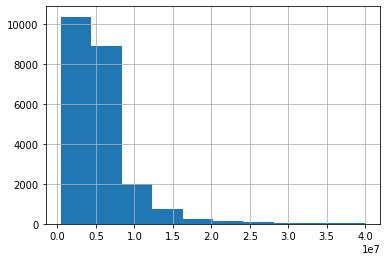

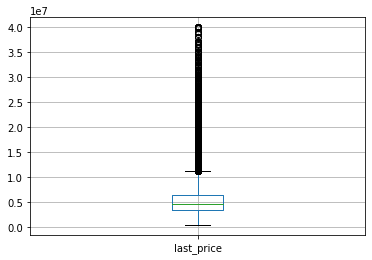

count    2.262500e+04
mean     5.658156e+06
std      4.045944e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.599000e+06
75%      6.500000e+06
max      4.000000e+07
Name: last_price, dtype: float64

In [34]:
data['last_price'].hist()
plt.show()

data.boxplot('last_price')
plt.show()

data['last_price'].describe()

В среднем цена квартиры на момент снятия с продажи составляла около 3.5-6.5 млн. (межквартильный размах от 3.4 до 6.5), медианная стоимость составляет 4.6 млн. (средняя - 5.7 млн), при этом  стоимость более 12 млн. - выбросы.

**Параметр "количество комнат"**

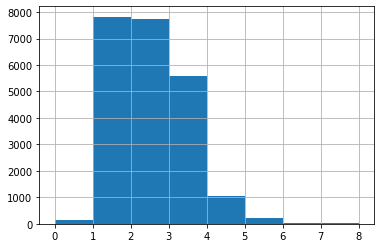

count    22625.000000
mean         2.021702
std          0.970670
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,exposition_weekday,exposition_month,exposition_year,floor_type,city_centers_nearest_km
140,144,1,2450000,27.0,2017-03-30,0,2.65,24,15.50000,2,False,True,False,4.653789,2,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0,90740.740741,3,3,2017,другой,NaN
336,347,4,2320000,25.0,2017-09-27,0,2.65,14,17.00000,1,False,False,True,4.309064,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0,92800.000000,2,9,2017,первый,NaN
486,505,0,3375000,34.4,2017-03-28,0,2.65,26,24.30000,19,False,False,True,5.929272,1,поселок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0,98110.465116,1,3,2017,другой,19.0
577,605,2,1850000,25.0,2019-02-20,0,2.65,10,14.20525,7,False,True,False,4.309064,0,поселок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0,74000.000000,2,2,2019,другой,NaN
657,693,12,2500000,24.1,2017-12-01,0,2.75,25,17.50000,21,False,True,False,4.153938,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0,103734.439834,4,12,2017,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22149,23079,7,3200000,26.0,2017-09-01,0,2.65,25,18.00000,16,False,True,False,4.481426,0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0,123076.923077,4,9,2017,другой,13.0
22375,23310,0,2500000,27.7,2017-09-28,0,2.65,24,18.00000,4,False,False,True,4.774443,2,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0,90252.707581,3,9,2017,другой,NaN
22484,23422,15,3350000,26.0,2018-09-07,0,2.65,19,14.77346,8,False,True,False,4.481426,0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0,128846.153846,4,9,2018,другой,17.0
22520,23459,10,1450000,29.0,2017-11-11,0,2.65,9,18.00000,8,False,False,True,4.998514,2,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0,50000.000000,5,11,2017,другой,NaN


,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,exposition_weekday,exposition_month,exposition_year,floor_type,city_centers_nearest_km
140,144,1,2450000,27.0,2017-03-30,0,2.65,24,15.50000,2,False,True,False,4.653789,2,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0,90740.740741,3,3,2017,другой,NaN
577,605,2,1850000,25.0,2019-02-20,0,2.65,10,14.20525,7,False,True,False,4.309064,0,поселок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0,74000.000000,2,2,2019,другой,NaN
657,693,12,2500000,24.1,2017-12-01,0,2.75,25,17.50000,21,False,True,False,4.153938,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0,103734.439834,4,12,2017,другой,NaN
1115,1168,12,3240000,29.0,2018-10-30,0,2.65,24,17.00000,2,False,True,False,4.998514,2,Санкт-Петербург,35129.0,16293.0,0.0,NaN,1.0,475.0,13.0,111724.137931,1,10,2018,другой,16.0
1116,1169,3,3900000,32.0,2016-10-18,0,2.70,24,18.00000,2,False,True,False,5.515602,2,Санкт-Петербург,44754.0,8409.0,1.0,609.0,0.0,NaN,540.0,121875.000000,1,10,2016,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21824,22737,8,3090000,30.0,2017-12-17,0,2.65,25,18.20000,5,False,True,False,5.170877,0,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0,103000.000000,6,12,2017,другой,16.0
21833,22747,2,4280000,28.0,2017-10-26,0,2.70,19,18.00000,10,False,True,False,4.826152,0,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0,152857.142857,3,10,2017,другой,7.0
22149,23079,7,3200000,26.0,2017-09-01,0,2.65,25,18.00000,16,False,True,False,4.481426,0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0,123076.923077,4,9,2017,другой,13.0
22484,23422,15,3350000,26.0,2018-09-07,0,2.65,19,14.77346,8,False,True,False,4.481426,0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0,128846.153846,4,9,2018,другой,17.0


In [35]:
data['rooms'].hist(bins=8)
plt.show()

display(data['rooms'].describe())

display(data[(data['rooms'] == 0)])

data[(data['rooms'] == 0) & (data['studio'] == True)]

Наибольшее количество объявлений о продаже одно-, двух- и трехкомнатных квартир. Объявления о продаже квартир с 4-мя 5-ю комнатами - встречаются гораздо реже. Есть нулевые значения: 2/3 квартир с нулевым количеством комнат - студии (неясно, как интерпретировать нулевое количество комнат в остальных случаях).

**Параметр "высота потолков"**

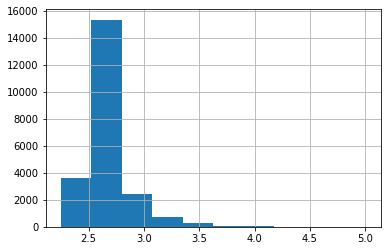

In [36]:
data['ceiling_height'].hist()
plt.show()

Наиболее часто встречается высота потолков от 2.55 м до 2.7 м.

**Параметр "этаж квартиры"**

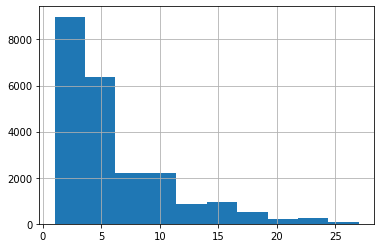

count    22625.000000
mean         5.859138
std          4.844269
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

In [37]:
data['floor'].hist()
plt.show()

data['floor'].describe()

Значение этажа от 1 до 27; чем больше значение этажа, тем меньше объектов.

**Параметр "тип этажа квартиры"**

<AxesSubplot:>

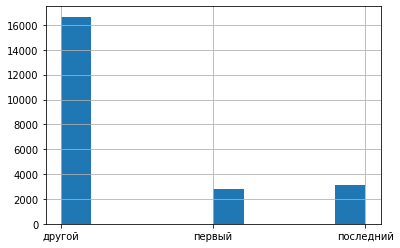

In [38]:
data['floor_type'].hist()

Квартир на первом и последнем этаже меньше, чем суммарно на других этажах.

**Параметр "общее количество этажей в доме"**

29

<AxesSubplot:>

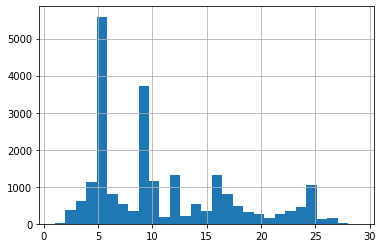

In [39]:
display(data['floors_total'].max())
data['floors_total'].hist(bins=29)

Наибольшее число квартир расположены в пяти- и девятиэтажных домах (предположительно, типовая застройка). Основная масса домов не выше 29 этажей.

**Параметр "расстояние до центра города в метрах"**

count    17262.000000
mean     14414.552601
std       8598.226750
min        181.000000
25%       9659.500000
50%      13224.500000
75%      16405.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<AxesSubplot:>

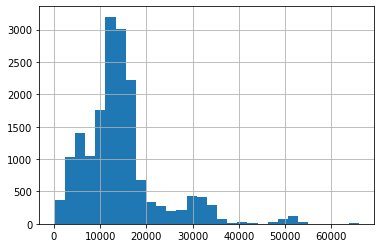

In [40]:
display(data['city_centers_nearest'].describe())
data['city_centers_nearest'].hist(bins=30)

Максимальное расстояние до центра города среди объектов, для которых эта информация указана, составляет около 66 км. При этом наибольшее количество выставленных на продажу квартир находятся в пределах 10-20 км. от центра города (медиана - 13224 м, среднее - 14414 м).

**Параметр "расстояние до ближайшего аэропорта"**

count    17242.000000
mean     28878.288424
std      12758.087590
min       6450.000000
25%      18428.000000
50%      26912.500000
75%      37412.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:>

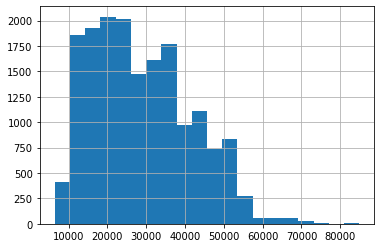

In [41]:
display(data['airports_nearest'].describe())
data['airports_nearest'].hist(bins=20)


В среднем расстояние до аэропорта составляет около 20-40 км (межквартильный размах - от 18428 м до 37412 м), медианное расстояние до аэропорта - 26,9 км (среднее - 28,9 км).

**Параметр "расстояние до ближайшего парка"**

count    7555.000000
mean      494.261284
std       341.333242
min         1.000000
25%       290.000000
50%       456.000000
75%       615.000000
max      3190.000000
Name: parks_nearest, dtype: float64

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,exposition_weekday,exposition_month,exposition_year,floor_type,city_centers_nearest_km
13943,14539,8,3770000,45.4,2019-03-20,2,2.65,9,28.43,2,False,False,False,6.900000,0,Санкт-Петербург,43932.0,16436.0,1.0,1.0,0.0,NaN,42.0,83039.647577,2,3,2019,другой,16.0
11390,11881,7,4500000,44.0,2017-11-24,2,2.60,9,30.00,7,False,False,False,7.000000,0,Санкт-Петербург,11806.0,12292.0,1.0,3.0,1.0,508.0,82.0,102272.727273,4,11,2017,другой,12.0
21894,22810,8,10965000,69.3,2019-01-10,1,3.00,4,48.90,4,True,False,False,11.944725,2,Зеленогорск,73391.0,54490.0,3.0,4.0,1.0,217.0,110.0,158225.108225,3,1,2019,последний,54.0
8912,9299,12,3000000,28.1,2017-07-25,1,2.50,9,17.00,1,False,False,False,5.600000,0,Санкт-Петербург,12051.0,11665.0,1.0,7.0,1.0,780.0,440.0,106761.565836,1,7,2017,первый,12.0
2399,2518,8,4690000,60.3,2016-03-05,2,2.50,5,28.00,2,False,False,False,7.900000,0,Кронштадт,69775.0,51500.0,3.0,9.0,3.0,345.0,146.0,77777.777778,5,3,2016,другой,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22617,23557,11,9470000,72.9,2016-10-13,2,2.75,25,40.30,7,False,False,False,10.600000,1,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0,129903.978052,3,10,2016,другой,4.0
22618,23558,2,1350000,30.0,2017-07-07,1,2.65,5,17.50,4,False,False,False,6.000000,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0,45000.000000,4,7,2017,другой,NaN
22621,23561,14,3100000,59.0,2018-01-15,3,2.65,5,38.00,4,False,False,False,8.500000,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52542.372881,0,1,2018,другой,NaN
22622,23562,18,2500000,56.7,2018-02-11,2,2.65,3,29.70,1,False,False,False,9.772957,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44091.710758,6,2,2018,первый,NaN


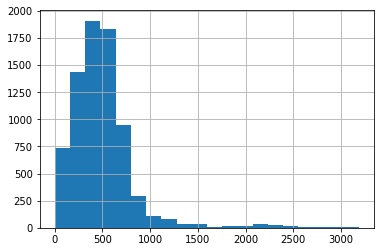

In [42]:
display(data['parks_nearest'].describe())
data['parks_nearest'].hist(bins=20)

data.sort_values('parks_nearest')

Среди объявлений, в которых указано расстояние до ближайшего парка, это расстояние в среднем составляет 500 м (медиана - 456, среднее - 494, межквартильный размах от 290 до 615).

**Параметр "день и месяц публикации объявления"**

3    4084
1    4009
4    3835
2    3785
0    3449
5    1846
6    1617
Name: exposition_weekday, dtype: int64

<AxesSubplot:>

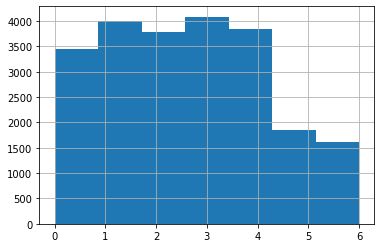

In [43]:
display(data['exposition_weekday'].value_counts())
data['exposition_weekday'].hist(bins=7)

2     2531
3     2478
11    2278
4     2257
10    2033
9     1897
6     1687
8     1672
7     1597
12    1567
1     1421
5     1207
Name: exposition_month, dtype: int64

<AxesSubplot:>

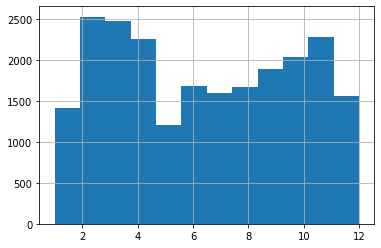

In [44]:
display(data['exposition_month'].value_counts())
data['exposition_month'].hist(bins=12)

В будние дни объявления публиковали чаще, чем в выходные (при этом в понедельник реже, чем в остальные будние дни); меньше всего объявлений появлялось в декабре и январе (месяцы до и после новогодних праздников), а также в мае (наименее "активный" месяц) и в летние месяцы, что можно связать с периодом отпусков и подготовкой к нему.

**Выводы:**

Обобщим данные по рассмотренным параметрам. Напомним, что наблюдения приводятся относительно данных после предобработки, то есть отличаются от выводов, сделанных применительно к "сырым" данным исходного датасета.

* **общая площадь (`'total_area'`)** – в среднем общая площадь выставленных на продажу квартир составляет около 40-70 кв.м. (межквартильный размах от 40 до 67.8), медианная площадь составляет 51.2 кв.м. (средняя - 57.1 кв.м.), при этом площадь квартир более 110 кв.м. - выбросы (это видно как на гистограмме, так и на диаграмме размаха);
* **жилая площадь(`'living_area'`)** - в среднем жилая площадь (суммарная площадь жилых помещений) выставленных на продажу квартир составляет около 20-40 кв.м. (межквартильный размах от 18.9 до 41.5), медианная площадь составляет 30 кв.м. (средняя - 32.7 кв.м.), при этом жилая площадь более 75 кв.м. - выбросы;
* **площадь кухни (`'kitchen_area'`)** - в среднем площадь кухни составляет около 7-12 кв.м. (межквартильный размах от  7 до 11.5), медианная площадь составляет 9 кв.м. (средняя - 9.9 кв.м.), при этом площадь кухни более 18 кв.м. - выбросы;
* **цена объекта (`'last_price'`)** – в среднем цена квартиры на момент снятия с продажи составляла около 3.5-6.5 млн. (межквартильный размах от 3.4 до 6.5), медианная стоимость составляет 4.6 млн. (средняя - 5.7 млн), при этом  стоимость более 12 млн. - выбросы;
* **количество комнат (`'rooms'`)** -  наибольшее количество объявлений о продаже одно-, двух- и трехкомнатных квартир. Объявления о продаже квартир с 4-мя 5-ю комнатами - встречаются гораздо реже. Есть нулевые значения: 2/3 квартир с нулевым количеством комнат - студии (неясно, как интерпретировать нулевое количество комнат в остальных случаях);
* **высота потолков (`'ceiling_height'`)** - наиболее часто встречается высота потолков от 2.55 м до 2.7 м;
* **этаж квартиры (`'floor'`)** – значение этажа от 1 до 27; чем больше значение этажа, тем меньше объектов;
* **тип этажа квартиры («первый», «последний», «другой») (`'floor_type'`)** – квартир на первом и последнем этаже меньше, чем суммарно на других этажах;
* **общее количество этажей в доме (`'floors_total'`)** – наибольшее число квартир расположены в пяти- и девятиэтажных домах (предположительно, типовая застройка). Основная масса домов не выше 29 этажей;
* **расстояние до центра города в метрах (`'city_centers_nearest'`)** – максимальное расстояние до центра города среди объектов, для которых эта информация указана, составляет около 66 км. При этом наибольшее количество выставленных на продажу квартир находятся в пределах 10-20 км. от центра города (медиана - 13224 м, среднее - 14414 м);
* **расстояние до ближайшего аэропорта (`'airports_nearest'`)** - в среднем расстояние до аэропорта составляет около 20-40 км (межквартильный размах - от 18428 м до 37412 м), медианное расстояние до аэропорта - 26,9 км (среднее - 28,9 км);
* **расстояние до ближайшего парка (`'parks_nearest'`)** – среди объявлений, в которых указано расстояние до ближайшего парка, это расстояние в среднем составляет 500 м (медиана - 456, среднее - 494, межквартильный размах от 290 до 615);
* **день и месяц публикации объявления (`'exposition_weekday'` и `'exposition_month'`)** – в будние дни объявления публиковали чаще, чем в выходные (при этом в понедельник реже, чем в остальные будние дни); меньше всего объявлений появлялось в декабре и январе (месяцы до и после новогодних праздников), а также в мае (наименее "активный" месяц) и в летние месяцы, что можно связать с периодом отпусков и подготовкой к нему.

#### Изучим, как быстро продавались квартиры

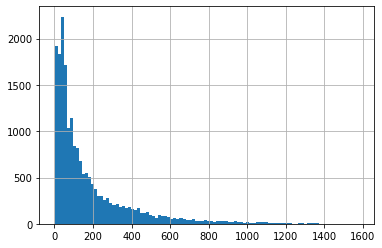

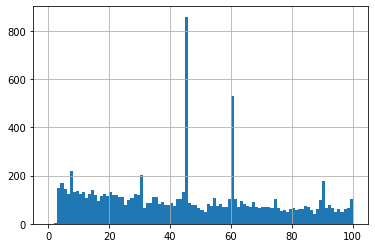

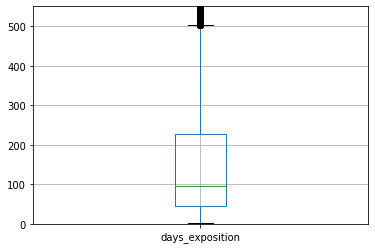

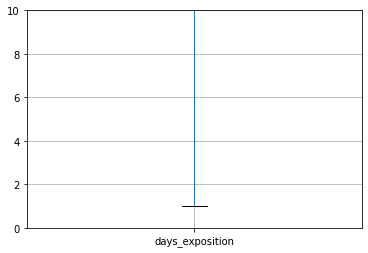

Среднее равно 178.71176949704744
Медиана равна 95.0


count    19644.000000
mean       178.711769
std        216.965737
min          1.000000
25%         45.000000
50%         95.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

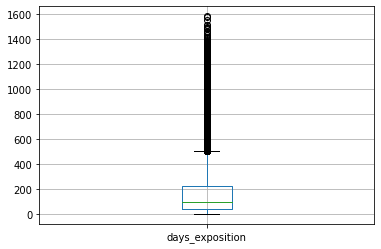

In [45]:
data['days_exposition'].hist(bins=100)
plt.show()

data['days_exposition'].hist(range=(0,100), bins=100)
plt.show()

data.boxplot('days_exposition', grid=True)
plt.ylim(0, 550)
plt.show()

data.boxplot('days_exposition', grid=True)
plt.ylim(0, 10)
plt.show()

data.boxplot('days_exposition', grid=True)

print('Среднее равно', data['days_exposition'].mean())
print('Медиана равна', data['days_exposition'].median())

display(data['days_exposition'].describe())



**Вывод:** время размещения объявлений варьирует в широких пределах (от 1 до 1580 дней). Разница между медианой (95) и средним (178.7) показывает большой разброс данных и наличие выбросов. В данном случае за среднюю величину правильнее принимать медиану, поэтому можно сделать вывод, что продажа квартиры в среднем занимает 95 дней, т.е. около 3-ех месяцев (данное значение выглядит правдоподобно). Межквартильный размах - от 45 до 228 дней. Значения, попадающие в размах усов - нормальные, за их пределами - выбросы. Аномально долгими можно считать продажи, если объявление "висело" более 500 дней, при этом никакие продажи не являются, согласно графику, аномально быстрыми.

**Примечание.** При рассмотрении срока размещения объявлений можно заметить аномально высокие показатели снятия с продажи на 45 и 60 день размещения. Можно предположить, что эти выбросы указывают не на факт продажи, а на снятие с продажи в связи с истечением срока размещения объявления (без продления). В Справке Яндекс.Недвижимости (https://yandex.ru/support/realty/owner/home/add-ads-housing.html) находим, что срок размещения объектов до стоимостью до 4,5 млн. - 45 дней, до 10 млн. - 60 дней, дороже 10 млн. - 90 дней (это еще раз подтверждает средний ценовой разброс от 3.5 до 6.5 млн. рублей, т.к. на графике выброс на 90 дней небольшой). Для более объективной оценки рынка было бы неплохо знать, какие размещения закончились продажей, а какие были сняты по иным причинам.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта

**Зависимость цены от общей площади**

0.7618524222370111

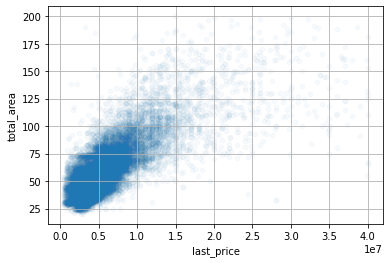

In [46]:
data.plot(x='last_price', 
          y='total_area',
          kind='scatter',
          grid=True, 
          alpha=0.03)

data['last_price'].corr(data['total_area'])

0.16624225712263235

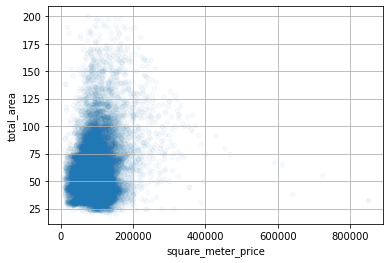

In [47]:
data.plot(x='square_meter_price', 
          y='total_area',
          kind='scatter',
          grid=True, 
          alpha=0.03)

data['square_meter_price'].corr(data['total_area'])

Получили довольно тривиальный результат: чем больше площадь, тем выше цена. Гораздо интереснее посмотреть, есть ли зависимость между общей площадью и ценой за квадратный метр: между общей площадью квартиры и ценой за квадратный метр зависимости не наблюдается.

<AxesSubplot:xlabel='total_area'>

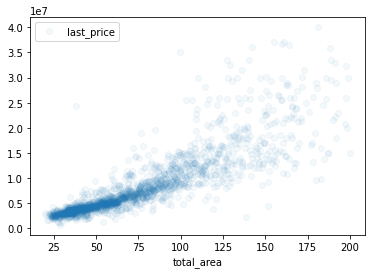

In [48]:
# также можно использовать сводные таблицы
total_area_pivot = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = 'median')
total_area_pivot.plot(y = 'last_price',
                      style = 'o',
                      alpha=0.05)

<AxesSubplot:xlabel='total_area'>

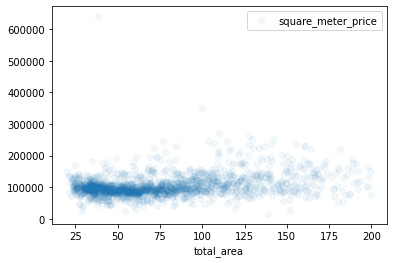

In [49]:
total_area_meter_pivot = data.pivot_table(index = 'total_area', values = 'square_meter_price', aggfunc = 'median')
total_area_meter_pivot.plot(y = 'square_meter_price',
                      style = 'o',
                      alpha=0.05)

Таким образом, можно сделать вывод, что существует прямая зависимость между общей площадью квартиры и полной ценой, но нет зависимости между общей площадью и ценой квадратного метра.

**Зависимость цены от жилой площади**

0.669306425302482

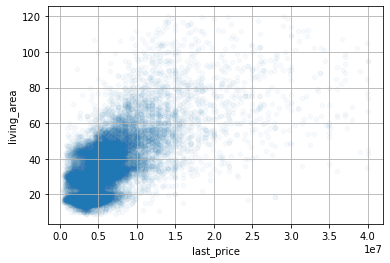

In [50]:
data.plot(x='last_price', 
          y='living_area',
          kind='scatter',
          grid=True, 
          alpha=0.03)

data['last_price'].corr(data['living_area'])

0.08503260086362073

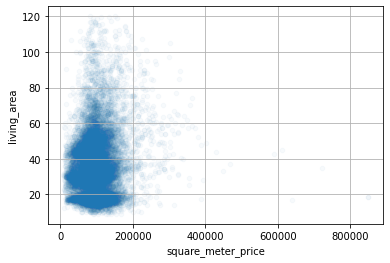

In [51]:
data.plot(x='square_meter_price', 
          y='living_area',
          kind='scatter',
          grid=True, 
          alpha=0.03)

data['square_meter_price'].corr(data['living_area'])

<AxesSubplot:xlabel='living_area'>

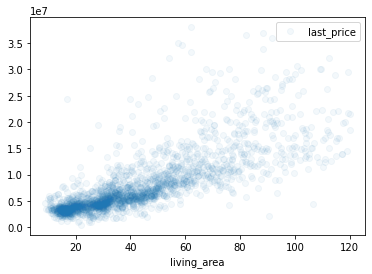

In [52]:
# также можно использовать сводные таблицы
living_area_pivot = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = 'median')
living_area_pivot.plot(y = 'last_price',
                      style = 'o',
                      alpha=0.05)

<AxesSubplot:xlabel='living_area'>

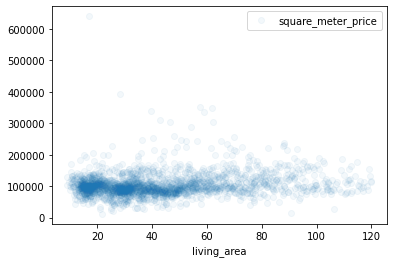

In [53]:
living_area_meter_pivot = data.pivot_table(index = 'living_area', values = 'square_meter_price', aggfunc = 'median')
living_area_meter_pivot.plot(y = 'square_meter_price',
                             style = 'o',
                             alpha=0.05)

Можно сделать вывод, что существует корреляция между полной стоимостью квартиры и жилой площадью, при этом нет зависимости между жилой площадью и ценой квадратного метра.

**Зависимость цены от площади кухни**

0.5739916417107968

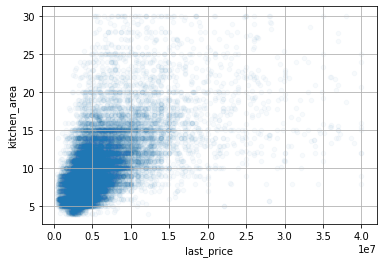

In [54]:
data.plot(x='last_price', 
          y='kitchen_area',
          kind='scatter',
          grid=True, 
          alpha=0.03)

data['last_price'].corr(data['kitchen_area'])

0.31200596244098494

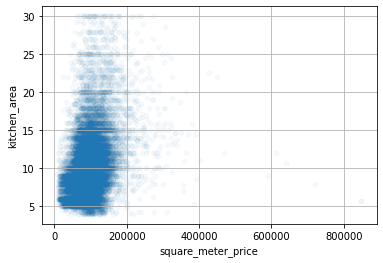

In [55]:
data.plot(x='square_meter_price', 
          y='kitchen_area',
          kind='scatter',
          grid=True, 
          alpha=0.03)

data['square_meter_price'].corr(data['kitchen_area'])

<AxesSubplot:xlabel='kitchen_area'>

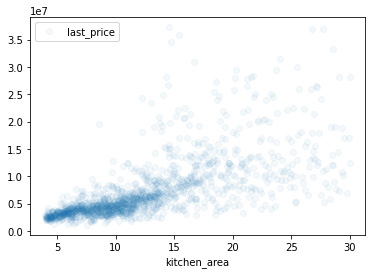

In [56]:
# также можно использовать сводные таблицы
kitchen_area_pivot = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = 'median')
kitchen_area_pivot.plot(y = 'last_price',
                      style = 'o',
                      alpha=0.05)

<AxesSubplot:xlabel='kitchen_area'>

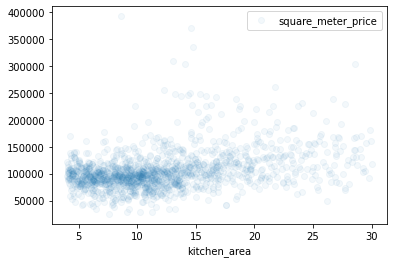

In [57]:
kitchen_area_meter_pivot = data.pivot_table(index = 'kitchen_area', values = 'square_meter_price', aggfunc = 'median')
kitchen_area_meter_pivot.plot(y = 'square_meter_price',
                             style = 'o',
                             alpha=0.05)

Можно сделать вывод, что существует определенная зависимость между площадью кухни и стоимостью квартиры, однако она меньше, чем для в рассмотренных выше случаях с общей площадью и жилой площадью. При этом есть небольшая корреляция между площадью кухни и ценой квадратного метра (зависимость больше, чем в рассмотренных выше случаях).

**Зависимость цены от количества комнат**

0.4709550270163692

,last_price
rooms,
0,2900000
1,3600000
2,4725000
3,6081395
4,8500000
5,11500000
6,12990000
7,17500000
8,19145000


<AxesSubplot:xlabel='rooms'>

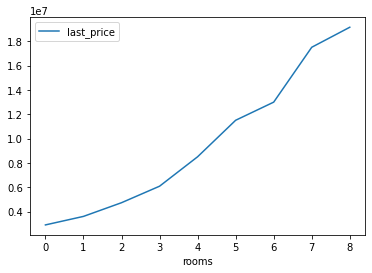

In [58]:
display(data['last_price'].corr(data['rooms']))

rooms_pivot = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median')
display(rooms_pivot.sort_values('last_price'))

rooms_pivot.plot(y='last_price')

-0.05877303743851494

,square_meter_price
rooms,
3,88235.294118
5,89827.586207
4,90051.020408
6,90193.845276
2,92379.852634
1,100000.000000
0,104285.714286
8,111694.909344
7,119617.224880


<AxesSubplot:xlabel='rooms'>

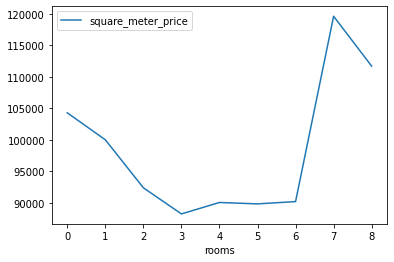

In [59]:
display(data['square_meter_price'].corr(data['rooms']))

rooms_pivot = data.pivot_table(index = 'rooms', values = 'square_meter_price', aggfunc = 'median')
display(rooms_pivot.sort_values('square_meter_price'))

rooms_pivot.plot(y='square_meter_price')

График показывает зависимость между полной ценой квартиры (медианные показатели для каждого значения количества комнат) и количеством комнат.  Коэффициент корреляции средний (по шкале Чеддока). При этом тенденция изменения цены квадратного метра выглядит интереснее: в квартирах с количеством комнат от 0 до 6 наблюдается обратная зависимость между количеством комнат и ценой квадратного метра (чем меньше комнат, тем дороже квадратный метр), а в многокомнатных квартирах с 7-ю и 8-ю комнатами цена квадратного метра дороже (предположительно элитное жилье).

**Зависимость цены от типа этажа, на котором расположена квартира (первый, последний, другой)**

,last_price
floor_type,
первый,3900000
последний,4200000
другой,4790000


<AxesSubplot:xlabel='floor_type'>

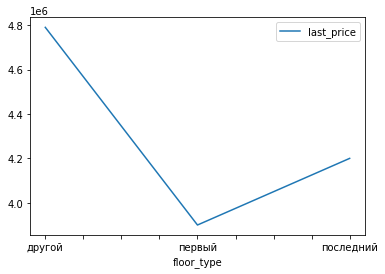

In [60]:
floor_type_pivot = data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = 'median')
display(floor_type_pivot.sort_values('last_price'))

floor_type_pivot.plot(y='last_price')

,square_meter_price
floor_type,
первый,80851.063830
последний,86842.105263
другой,97636.585792


<AxesSubplot:xlabel='floor_type'>

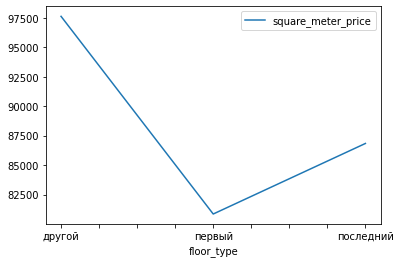

In [61]:
floor_type_pivot = data.pivot_table(index = 'floor_type', values = 'square_meter_price', aggfunc = 'median')
display(floor_type_pivot.sort_values('square_meter_price'))

floor_type_pivot.plot(y='square_meter_price')

Графики показывают, что, как в случае с полной ценой, так и с ценой квадратного метра, наиболее низкие показатели наблюдаются для квартир на первом этаже, квартиры на последнем этаже в среднем дороже, чем на первом, но дешевле, чем на остальных этажах.

**Зависимость цены от даты размещения (день недели, месяц, год)**

* *зависимость цены от дня недели*

,mean,median
exposition_weekday,,
0,5.660431e+06,4600000
1,5.675447e+06,4690000
2,5.751093e+06,4650000
3,5.771906e+06,4591800
4,5.538961e+06,4500000
5,5.501884e+06,4500000
6,5.566690e+06,4500000


<AxesSubplot:xlabel='exposition_weekday'>

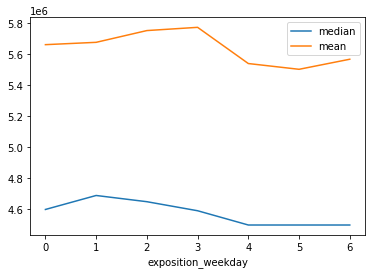

In [62]:
weekday_pivot = data.pivot_table(index = 'exposition_weekday', 
                                    values = 'last_price', 
                                    aggfunc = ['mean','median'])
weekday_pivot.columns=['mean','median']

display(weekday_pivot)

weekday_pivot.plot(y=['median','mean'])

,mean,median
exposition_weekday,,
0,96526.621894,94117.647059
1,96882.091445,95121.951220
2,97071.824431,95065.789474
3,96726.787803,94417.580056
4,95901.236328,93750.000000
5,94745.466305,92807.224542
6,95634.575700,93846.153846


<AxesSubplot:xlabel='exposition_weekday'>

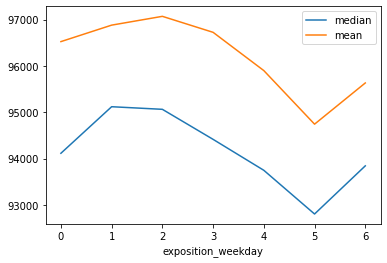

In [63]:
weekday_meter_pivot = data.pivot_table(index = 'exposition_weekday', 
                                    values = 'square_meter_price', 
                                    aggfunc = ['mean','median'])
weekday_meter_pivot.columns=['mean','median']
display(weekday_meter_pivot)

weekday_meter_pivot.plot(y=['median','mean'])

В целом средняя цена как квартир в целом, так и квадратного метра слабо зависит от дня недели, в который было размещено объявление. Можно заметить, что цена объектов, выставленных на продажу в пятницу и на выходных несколько ниже, чем в будние дни (цена квадратного метра ниже всего в объявлениях, выставленных в субботу).

* *зависимость цены от месяца размещения объявления*

,mean,median
exposition_month,,
1,5.681059e+06,4550000
2,5.621514e+06,4600000
3,5.602557e+06,4600000
4,5.609244e+06,4700000
5,5.717399e+06,4500000
6,5.508347e+06,4350000
7,5.568031e+06,4575000
8,5.760514e+06,4550000
9,5.786085e+06,4650000


<AxesSubplot:xlabel='exposition_month'>

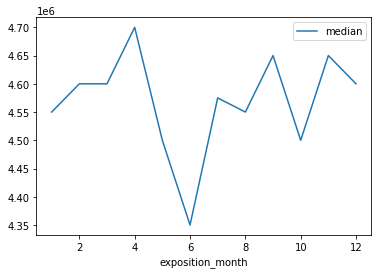

In [64]:
month_pivot = data.pivot_table(index = 'exposition_month', 
                                    values = 'last_price', 
                                    aggfunc = ['mean','median'])
month_pivot.columns=['mean','median']
display(month_pivot)

month_pivot.plot(y='median')

,mean,median
exposition_month,,
1,96777.408655,94696.969697
2,95828.313878,94444.444444
3,96507.321026,94653.689587
4,97828.199264,95555.555556
5,96038.880106,92222.222222
6,94926.009290,92307.692308
7,95601.061248,94017.094017
8,97667.005429,95310.884429
9,97220.679925,95238.095238


<AxesSubplot:xlabel='exposition_month'>

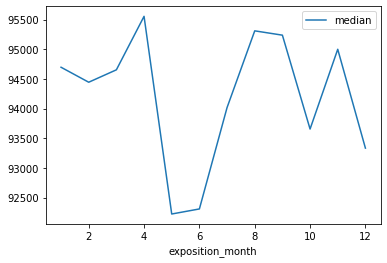

In [65]:
month_meter_pivot = data.pivot_table(index = 'exposition_month', 
                                    values = 'square_meter_price', 
                                    aggfunc = ['mean','median'])
month_meter_pivot.columns=['mean','median']
display(month_meter_pivot)

month_meter_pivot.plot(y='median')

Как целая цена, так и цена квадратного метра ниже всего в мае и июне. Возможно, это связано с будущим сезоном отпусков и низким сезонным спросом (в это же время на продажу выставляется мало объявлений). В то же время несколько удивляет пик в декабре (при снижении количества объявлений). Также можно сопоставить данные о ценах с рассмотренными ранее данными о количестве выставленных на продажу квартир. Летом и перед Новым годом количество квартир меньше и цены ниже, что можем говорить о сезонных изменениях рынка недвижимости.

* *зависимость цены от года*

,mean,median
exposition_year,,
2014,9.349185e+06,6950000
2015,6.427780e+06,5100000
2016,5.721075e+06,4490000
2017,5.566810e+06,4450000
2018,5.475758e+06,4500000
2019,5.942094e+06,5000000


<AxesSubplot:xlabel='exposition_year'>

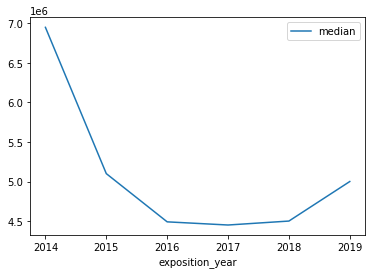

In [66]:
year_pivot = data.pivot_table(index = 'exposition_year', 
                                    values = 'last_price', 
                                    aggfunc = ['mean','median'])
year_pivot.columns=['mean','median']

display(year_pivot)

year_pivot.plot(y='median')

,mean,median
exposition_year,,
2014,111886.935605,104851.674641
2015,97261.472771,91851.285190
2016,94500.580629,91116.173121
2017,94462.969798,91921.499161
2018,95991.430944,95235.680479
2019,103985.435976,102687.833432


<AxesSubplot:xlabel='exposition_year'>

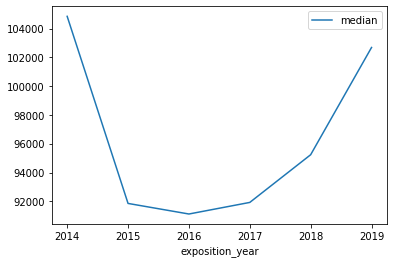

In [67]:
year_meter_pivot = data.pivot_table(index = 'exposition_year', 
                                    values = 'square_meter_price', 
                                    aggfunc = ['mean','median'])
year_meter_pivot.columns=['mean','median']

display(year_meter_pivot)

year_meter_pivot.plot(y='median')

Средняя цена квартир менялась в зависимости от года размещения объявления. В 2014 году наблюдались пиковые показатели. Вероятнее всего, это связано с кризисом 2014 года, далее цены резко снизились (вероятно, в связи с падением спроса и снижением покупательной способности населения), после чего стали постепенно повышаться (реакция на естественную инфляцию).

Поскольку похожая динамика наблюдалась как для полной цены объектов, так и для одного квадратного метра, маловероятно, что изменение цены по годам связано с изменением площади продаваемых квартир.  Однако рассмотрим изменение площади продаваемых квартир по годам. В отличие от цены, которая упала в 2015-16 годах, а потов все время повышалась, общая площадь продаваемых квартир стабильно уменьшается с каждым годом.

,mean,median
exposition_year,,
2014,79.009741,75.000
2015,64.022394,58.150
2016,58.798843,53.000
2017,57.119568,51.000
2018,55.703323,50.095
2019,56.122164,51.000


<AxesSubplot:xlabel='exposition_year'>

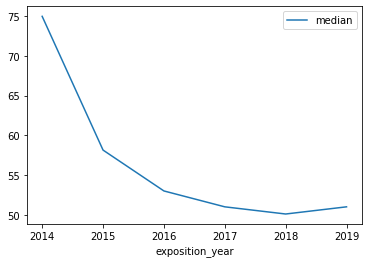

In [68]:
year_meter_pivot = data.pivot_table(index = 'exposition_year', 
                                    values = 'total_area', 
                                    aggfunc = ['mean','median'])
year_meter_pivot.columns=['mean','median']

display(year_meter_pivot)

year_meter_pivot.plot(y='median')

**Выводы:** мы рассмотрели как значение полной цены, так и квадратного метра.
Общая цена предсказуемо зависит от площади (общей и в меньшей степени жилой и площади кухни) квартиры, а также от количества комнат. Цена квадратного метра не зависит от общей площади, но обратно пропорциональна количеству комнат (кроме многокомнатных квартир, предположительно, относящихся к элитному сегменту жилья)

Как общая стоимость, так и цена одного квадратного метра зависит от типа этажа квартиры (дешевле всего квартиры на первом этаже, квартиры на последнеднем этаже дороже, чем на первом, но дешевле, чем на остальных). Также можно заметить зависимость между ценой и временем размещения объявления (особенно это касается месяца и года).

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [69]:
locality_pivot = data.pivot_table(index = 'locality_name', 
                                  values = 'square_meter_price', 
                                  aggfunc = ['count','mean','median'])
locality_pivot.columns = ['count','mean','median']                
                  
locality_pivot.sort_values('count', ascending=False).head(10).sort_values('median', ascending=False)

,count,mean,median
locality_name,,,
Санкт-Петербург,14887,110855.345872,103938.730853
Пушкин,356,102764.244046,99725.495196
деревня Кудрово,289,92338.927426,91803.278689
поселок Парголово,325,90291.780571,91642.857143
поселок Мурино,524,85062.824302,84381.592827
поселок Шушары,432,78322.366007,76666.666667
Колпино,335,75295.341066,74722.222222
Гатчина,302,68554.128885,67417.279412
Всеволожск,385,68675.423111,65789.473684


**Вывод:** из 10 населенных пунктов с наибольшим числом объявлений самая высокая цена квадратного метра наблюдается для Санкт-Петербурга, вторым населенным пунктом с наиболее высокой ценой является Пушкин. Ниже всего цена квадратного метра в Выборге. На цену квадратного метра в данном случае влияет близость к Санкт-Петербургу и наличие объектов, представляющих культурную ценность.

#### Опишите, как стоимость объектов зависит от расстояния до центра города.

mean                        median  \
                           last_price square_meter_price last_price   
city_centers_nearest_km                                               
0.0                      1.407986e+07      141335.404892   11500000   
1.0                      1.177650e+07      143443.696730    9990000   
2.0                      1.115191e+07      136412.689058    9200000   
3.0                      9.471070e+06      117125.345463    8150000   
4.0                      1.036808e+07      125854.126253    8800000   
5.0                      1.058511e+07      132655.929968    8770000   
6.0                      9.963380e+06      135718.772032    8100000   
7.0                      1.009780e+07      137224.474235    7000000   
8.0                      8.540748e+06      122500.993452    7000000   
9.0                      6.776896e+06      112710.600161    5290000   
10.0                     6.227463e+06      112341.737462    4999500   
11.0                     6.020620e+06      107669.791573    4999000   
12.0                     5.775756e+06      107380.300943    4950000   
13.0                     5.968070e+06      107825.859132    5200000   
14.0                     5.513758e+06      103772.146955    4850000   
15.0                     5.656352e+06      103792.711310    4880000   
16.0                     5.289648e+06      100126.909257    4750000   
17.0                     5.179316e+06       96931.589857    4580000   
18.0                     4.819896e+06       96531.371358    4300000   
19.0                     5.066903e+06       98561.126628    4500000   
20.0                     4.611579e+06       87214.901385    4700000   
21.0                     5.432400e+06       93568.543007    5220000   
22.0                     5.398680e+06       91195.374776    4925000   
23.0                     4.693309e+06       90719.696687    4400000   
24.0                     3.854430e+06       85736.904595    3480000   
25.0                     3.974954e+06       91949.383239    3689762   
26.0                     4.014287e+06       87798.872892    3355000   
27.0                     8.300000e+06      132115.709459    8300000   
28.0                     5.026429e+06       81161.915320    4990000   
29.0                     4.236667e+06       72953.365445    4535000   

                                                count                     
                        square_meter_price last_price square_meter_price  
city_centers_nearest_km                                                   
0.0                          110357.583231         17                 17  
1.0                          121359.223301        157                157  
2.0                          116981.132075        253                253  
3.0                          108055.555556        311                311  
4.0                          116926.780030        630                630  
5.0                          125373.134328        807                807  
6.0                          124884.473198        532                532  
7.0                          122281.867757        366                366  
8.0                          121153.846154        558                558  
9.0                          105555.555556        575                575  
10.0                         106404.340767        700                700  
11.0                         103163.485222       1146               1146  
12.0                         103906.250000       1567               1567  
13.0                         103658.536585       1419               1419  
14.0                         101495.535714       1248               1248  
15.0                         101045.296167       1517               1517  
16.0                          97218.750000       1239               1239  
17.0                          94512.195122        859                859  
18.0                          95000.000000        256                256  
19.0                          96994.535

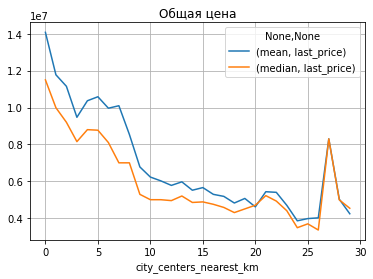

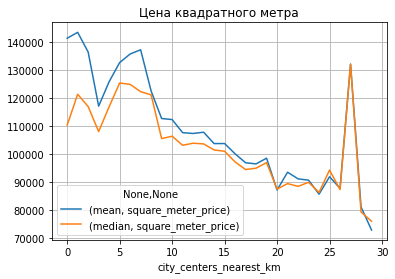

In [70]:
# срез квартир в Санкт-Петербурге
data_spb_pivot = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_centers_nearest_km', 
                                                                        values=['last_price', 'square_meter_price'],
                                                                       aggfunc=['mean','median', 'count'])
display(data_spb_pivot)

data_spb_pivot.plot(y=[('mean', 'last_price'), ('median', 'last_price')], grid = True, title = 'Общая цена')
plt.show()

data_spb_pivot.plot(y=[('mean', 'square_meter_price'), ('median', 'square_meter_price')], grid = True, title = 'Цена квадратного метра')
plt.show()

**Вывод:** В целом, как общая цена квартиры, так и цена квадратного метра становится дешевле по мере отдаления от центра Санкт-Петербурга. Любопытный "пик" наблюдается на 27 километре от центра города, но объектов, по которым расчитывается среднее для 27-го километра, всего два, поэтому принимать их во внимание не совсем правильно. К тому же обращает на себя внимание то обстоятельство, что объявлений на последних обозначенных километрах очень мало. 

**Примечание.** Обратимся к данным и рассмотрим все объекты, находящиеся на расстоянии 27 км от центра города. В большинстве случаев квартиры находятся в Пушкине (определенном ранее как объект с самыми дорогими квартирами после Санкт-Петербурга). Возможно, допущена ошибка в указании населенного пункта для двух объектов, по которым выше считали среднее).

Следует заметить, что все населенные пункты на 27-ом километре от центра в действительности входят в черту города Санкт-Петербурга (не относятся к Ленинградской области!), т.е. в данном случае не совсем понятно, каковы границы населенного пункта "Санкт-Петербург" в рассматриваемом архиве объявлений.

In [71]:
data.loc[data['city_centers_nearest_km'] == 27].value_counts('locality_name')

locality_name
Пушкин                     67
поселок Металлострой       30
Санкт-Петербург             2
Красное Село                1
поселок Александровская     1
поселок Петро-Славянка      1
dtype: int64

### Общий вывод

Был проведен исследовательский анализ данных о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Были изучены параметры объектов, выставленных на продажу, и то, какие параменты влияют на цену квартиры. 
В ходе исследования были выполнены следующие действия:
* проведен обзор данных;
* выполнена предобработка данных;
* в таблицу добавлены столбцы, необходимые исследования;
* изучены параметры объектов недвижимости;
* изучена скорость продажи квартир и выявлены аномалии;
* рассмотрены факторы, влияющие на ценообразование.

**Приведем наиболее важные результаты исследования.**
* Продажа квартиры в среднем занимает 3 месяца, при этом "нормальным" можно считать всемя продажи до 500 дней.
* Рынок недвижимости характеризуется сезонностью в мае и в летние месяцы, а также в декабре публикуется меньшее количество новых объявлений и наблюдается снижение цены.
* Цену, как общую, так и одного квадратного метра влияет ряд параметров, среди которых наиболее важными можно считать:
    * площадь квартиры и количество комнат (напрямую влияют на полную цену квартиры, более сложная связь наблюдается между ценой ценой квадратного метра и количеством комнат: обратная зависимость за исключением многокомнатных квартир);
    * тип этажа квартиры (на первом и последнем этажах квартиры дешевле, чем на остальных);
    * время публикации объекта (особенно интересен год публикации объявления: на изменения цены влияет экономическая ситуация в стране, уровень платежеспособности населения и инфляция);
    * расположение объекта (населенный пункт и его особенности, а также близость к центру Санкт-Петербурга).